<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-5_February-3-2026/Assignment-2_FirstSteps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemical Applications of Machine Learning (CHEM 4930/5610) - Spring 2026

### Assignment 2 - Deadline 2/3/2026
Points 10

#### General Comments
All figures and graph should have approriate labels on the two axis, and should include a legend with appropriate labels of the different plots.

The notebook should be return in working format. That is, I should be able to reset all the output and re-run all the cells and get the same results as you obtained.

**You should start by saving a copy of the notebook to your Google Drive so you preserve all changes.**

**Please add your name as a suffix to the filname**

**Student Name**: Add your name here

**AI usage statement:**
Here you should give a statement about any usage of AI tools to assist you with the coding.

### Task 1 - 10 points

In this task, we will consider the Bradley Melting Point Dataset, which is curated chemical dataset with melting points of around 3,000 chemical compounds, see [here](https://www.kaggle.com/datasets/aliffaagnur/melting-point-chemical-dataset/data).

This dataset is stored in a comma-separated values (csv) file, which is common format used to start data in text files. We can load this into a pandas DataFrame using the `load_csv` function.

In this dataset, we have the compounds names, SMILES strings, and the melting point in Celsius.

#### A)
Identify in the dataset the chemical compounds with the 5 lowest melting points and 5 highest melting points and visualize their 2D chemical structure using RDKit and the [mols2grid package](https://mols2grid.readthedocs.io/en/latest/), where you display the melting point values on the grid, see [here](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/A_Whirlwind_Introduction_To_The_RDKit.ipynb#scrollTo=N3CR7rMF3sg7) for an example of the usage of mols2grid.

#### B)
Calculate the following properties for the molecules using RDKIt:
- The molecular weight
- The number of heavy atoms
- Number of hydrogen bond acceptors
- Number of hydrogen bond donors
- [Octanol-water partition coefficient - LogP](https://pubs-acs-org.libproxy.library.unt.edu/doi/10.1021/ci990307l)
- [Topological polar surface area (TPSA) descriptor](https://pubs-acs-org.libproxy.library.unt.edu/doi/abs/10.1021/jm000942e)
- Topological polar surface area (TPSA) descriptor, including S and P atoms, see [here](https://www.rdkit.org/docs/RDKit_Book.html#implementation-of-the-tpsa-descriptor)

Note: for some of the molecules, the TPSA descriptor will give a value of zero. When doing any analysis for the TPSA descriptor, you should ignore these values.

#### C)
Write out to a new csv file values of all the properties calculated in B) along with the compound names, SMILES strings, and the melting point in Celsius. Here, when writing this file, you should ignore any compounds where the SMILES conversion did not work correctly.

#### D)
Perform a linear regression analysis using scikit-learn where you look at the correlation of each of the properties calculated in B) with melting temperature. Here, each property should be considered individually.

To avoid outliers, filter out (i.e., remove) the compounds with the lowest 10% and the highest 10% melting temperature. Make a histogram that shows this filtering. Furthermore, for each property, filter out the compounds with lowest 10% and highest 10% values (again making a histogram that shows this filtering). Only consider the joint remaining compounds in your linear regression analysis for each property.

When performing the linear regression, employ a 70%/30% training/test split.

Calculate the coefficient of determination, $R^2$, for both the training dataset and the test dataset and report both.

You should make figure that shows the data along with the linear curve coming from the linear regression. In the figure, it should be clear which data points are in the training and test set (e.g., by having them in different colors). Include the $R^2$ values on the figure.

From your analysis, which of the properties correlates best with the melting temperature?

#### E)
For two of the properties from D) (e.g., the ones that correlate best with the melting point), perform [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus) regression, which is method that takes outliers into account when performing linear regression and does not include them in the final modeling, see [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html).

In the figure, it should be clear which data points are in inlier set and which are in the outlier set (e.g., by showing them in different colors).


In [ ]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="BradleyDoublePlusGoodMeltingPointDataset.csv"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# the %%capture command will surpress output to screen
#%%capture
!pip install rdkit mols2grid

In [ ]:
from rdkit import Chem

In [ ]:
data_mp = pd.read_csv("BradleyDoublePlusGoodMeltingPointDataset.csv")

In [ ]:
data_mp

In [ ]:
print(list(data_mp.keys()))

In [ ]:
melting_point_C = data_mp['mpC']
print(melting_point_C)

In [ ]:
indices_5_lowest = np.argpartition(melting_point_C,5)[:5]
print(indices_5_lowest)

In [ ]:
data_mp.describe()

In [ ]:
data_mp[['name', 'smiles', 'mpC']]

In [ ]:
# here we use the .iloc to only show the specifc 5 lowest mpC
data_mp[['name', 'smiles', 'mpC']].iloc[indices_5_lowest]

In [ ]:
data_mp['name'].iloc[indices_5_lowest]


In [ ]:
data_mp['mpC'][indices_5_lowest]

In [ ]:
indices_5_highest = np.argpartition(melting_point_C,-5)[-5:]
print(indices_5_highest)

In [ ]:
# here we use the .iloc to only show the specifc 5 highest mpC
data_mp[['name', 'smiles', 'mpC']].iloc[indices_5_highest]

In [ ]:
data_mp['mpC'][indices_5_highest]

In [ ]:
mols_5_lowest = [Chem.MolFromSmiles(smi) for smi in data_mp['smiles'][indices_5_lowest]]

In [ ]:
mols_5_lowest[3]

In [ ]:
import mols2grid


In [ ]:
mols2grid.display(mols_5_lowest)

In [ ]:
from rdkit.Chem import Draw #RDKit drawing

In [ ]:
Draw.MolsToGridImage(mols_5_lowest,molsPerRow=5,useSVG=True)

In [ ]:
mols_5_highest = [Chem.MolFromSmiles(smi) for smi in data_mp['smiles'][indices_5_highest]]

In [ ]:

mols2grid.display(mols_5_highest)

In [ ]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
mols2grid.display(data_mp, smiles_col='smiles')

In [ ]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
mols2grid.display(data_mp,smiles_col='smiles',subset=['img','name','smiles','mpC'])

In [ ]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
mols2grid.display(data_mp.iloc[indices_5_highest],smiles_col='smiles',subset=['img','name','mpC'])

In [ ]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
mols2grid.display(data_mp.iloc[indices_5_lowest],smiles_col='smiles',subset=['img','name','mpC'])

In [ ]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
# Here we also format the string for the melting point to show the C.

def mp_str(x):
    return f'{x:.2f} C'

mols2grid.display(data_mp.iloc[indices_5_highest],
                  smiles_col='smiles',
                  subset=['img','name','mpC'],
                  transform={"mpC": mp_str})

In [ ]:
from rdkit.Chem import Descriptors

def number_of_rotatable_bonds(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.NumRotatableBonds(mol)
  else:
    return np.nan

def molecular_weight(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.MolWt(mol)
  else:
    return np.nan


In [ ]:
# here we calculate some property and add that to the dataframe
data_mp['NumRotatableBond'] = [number_of_rotatable_bonds(smi) for smi in data_mp['smiles']]
data_mp['MW'] = [molecular_weight(smi) for smi in data_mp['smiles']]

In [ ]:
data_mp

In [ ]:
def mp_str(x):
    return f'{x:.2f} C'

def mw_str(x):
    return f'{x:.2f} Da'

def number_of_rotatable_bonds_str(x):
    return f'Rotatable bonds: {x:.0f}'

mols2grid.display(data_mp,smiles_col='smiles',
                  subset=['name','MW','NumRotatableBond','mpC'],
                  transform={'mpC': mp_str, 'MW': mw_str, 'NumRotatableBond': number_of_rotatable_bonds_str}
                  )

In [ ]:
# def tpsa(smi, includeSandP=False):
#   mol = Chem.MolFromSmiles(smi)
#   if mol is not None:
#     if includeSandP:
#       return Descriptors.TPSA(mol,includeSandP=True)
#     else
#       return Descriptors.TPSA(mol)
#   else:
#     return np.nan

def tpsa(smi, withSandP=False):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.TPSA(mol,includeSandP=withSandP)
  else:
    return np.nan


In [ ]:
data_mp['TPSA'] = [tpsa(smi) for smi in data_mp['smiles']]
data_mp['TPSA_SP'] = [tpsa(smi, withSandP=True) for smi in data_mp['smiles']]

In [ ]:
data_mp[ ['TPSA','TPSA_SP'] ]

In [ ]:
def mp_str(x):
    return f'{x:.2f} C'

def mw_str(x):
    return f'{x:.2f} Da'

def number_of_rotatable_bonds_str(x):
    return f'Rotatable bonds: {x:.0f}'

def tpsa_str(x):
    return f'TPSA: {x:.1f} A^2'

def tpsa_sp_str(x):
    return f'TPSA_SP: {x:.1f} A^2'

mols2grid.display(data_mp,smiles_col='smiles',
                  subset=['name','MW','NumRotatableBond','mpC','TPSA', 'TPSA_SP'],
                  transform={'mpC': mp_str,
                             'MW': mw_str,
                             'NumRotatableBond': number_of_rotatable_bonds_str,
                             'TPSA': tpsa_str,
                             'TPSA_SP': tpsa_sp_str}
                  )

In [ ]:
data_mp['name']

#### How to filter out molecules with NaN values

In [77]:
nan_mask = np.isnan(data_mp['MW'].to_numpy())

data_mp.iloc[np.logical_not(nan_mask)]

data_mp_ignore_nan = data_mp.iloc[np.logical_not(nan_mask)]

In [79]:
data_mp.describe()

,key,mpC,csid,count,min,max,range,NumRotatableBond,MW,TPSA,TPSA_SP
count,3041.000000,3041.000000,3.041000e+03,3041.000000,3041.000000,3041.000000,3041.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,10771.570865,62.848159,2.027796e+06,2.798422,62.229536,63.879092,1.649556,2.296860,180.528716,33.417812,35.766912
std,6875.518120,96.007422,5.474893e+06,1.275456,95.877685,96.229485,1.293567,3.439933,80.114001,27.943325,29.244735
min,10.000000,-188.000000,1.800000e+01,2.000000,-188.000000,-187.600000,0.010000,0.000000,16.043000,0.000000,0.000000
25%,5148.000000,5.000000,7.634000e+03,2.000000,4.800000,5.600000,0.500000,0.000000,129.247000,12.890000,17.070000
50%,13103.000000,64.000000,1.282900e+04,2.000000,62.750000,65.000000,1.000000,1.000000,166.180000,29.460000,34.140000
75%,15269.000000,129.500000,6.675900e+04,3.000000,129.000000,130.800000,2.500000,3.000000,214.648000,47.580000,51.480000
max,28644.000000,438.000000,2.142902e+07,16.000000,437.300000,440.000000,5.000000,47.000000,959.171000,221.290000,237.750000


In [80]:
data_mp_ignore_nan.describe()

,key,mpC,csid,count,min,max,range,NumRotatableBond,MW,TPSA,TPSA_SP
count,3025.000000,3025.000000,3.025000e+03,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,10746.770248,62.254496,2.036780e+06,2.798678,61.636536,63.284635,1.648099,2.296860,180.528716,33.417812,35.766912
std,6885.046638,95.663463,5.487405e+06,1.278174,95.537341,95.885451,1.291075,3.439933,80.114001,27.943325,29.244735
min,10.000000,-188.000000,1.800000e+01,2.000000,-188.000000,-187.600000,0.010000,0.000000,16.043000,0.000000,0.000000
25%,5112.000000,5.000000,7.659000e+03,2.000000,4.500000,5.500000,0.500000,0.000000,129.247000,12.890000,17.070000
50%,12815.000000,63.000000,1.285800e+04,2.000000,62.000000,64.500000,1.000000,1.000000,166.180000,29.460000,34.140000
75%,15264.000000,129.000000,6.684700e+04,3.000000,128.000000,130.000000,2.500000,3.000000,214.648000,47.580000,51.480000
max,28644.000000,438.000000,2.142902e+07,16.000000,437.300000,440.000000,5.000000,47.000000,959.171000,221.290000,237.750000


In [88]:
melting_point_c = data_mp['mpC'].to_numpy()
molecular_weight = data_mp['MW'].to_numpy()

nan_mask = np.isnan(molecular_weight)

molecular_weight_wo_nan = molecular_weight[np.logical_not(nan_mask)]
melting_point_c_wo_nan = melting_point_c[~(nan_mask)]




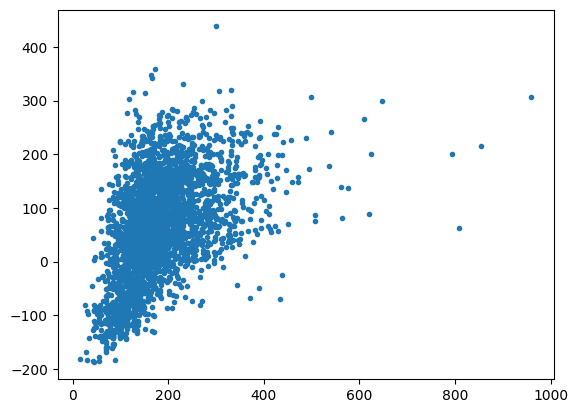

In [84]:
wplt.plot(molecular_weight,melting_point_c,'.')

In [99]:
!head BradleyDoublePlusGoodMeltingPointDataset.csv

key,name,smiles,mpC,csid,link,source,count,min,max,range
27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the American Chemical Society; 74(22); 5732-5736 (1952),2,-161.51,-161.5,0.009999999999990905
16005,Nitrogen oxide,[O-][N+]#N,-90.8,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.8,0.010000000000005116
16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.8,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.8,0.01999999999998181
17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.8,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JBO. 2008 Why are some properties more difficult to predict than others? A study of QSPR models of solubility; melting point and LogP. J. Chem. Inf. Model. 2008. 48 (1). pp 220?285,2,94.75,94.8,0.04999999999999716
15628,Bromine,BrBr,-7.2,22817,http://msds.chem.ox.ac.uk/,academic website,2,-7.25,-7.2,0.0499999

In [104]:
data_mp_ignore_nan.to_csv("test-all.csv",index=False)

In [105]:
!head test-all.csv

key,name,smiles,mpC,csid,link,source,count,min,max,range,NumRotatableBond,MW,TPSA,TPSA_SP
27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the American Chemical Society; 74(22); 5732-5736 (1952),2,-161.51,-161.5,0.0099999999999909,0.0,70.135,0.0,0.0
16005,Nitrogen oxide,[O-][N+]#N,-90.8,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.8,0.0100000000000051,0.0,44.013,51.209999999999994,51.209999999999994
16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.8,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.8,0.0199999999999818,0.0,102.06099999999999,34.14,42.52
17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.8,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JBO. 2008 Why are some properties more difficult to predict than others? A study of QSPR models of solubility; melting point and LogP. J. Chem. Inf. Model. 2008. 48 (1). pp 220?28

In [106]:
data_mp_ignore_nan[ ['key','name','MW','TPSA'] ].to_csv("test-subset.csv",index=False)

In [107]:
!head test-subset.csv

key,name,MW,TPSA
27956,cyclobutylmethane,70.135,0.0
16005,Nitrogen oxide,44.013,51.209999999999994
16127,Sulfuryl difluoride,102.06099999999999,34.14
17138,disopyramide,339.4830000000002,59.220000000000006
15628,Bromine,159.808,0.0
16624,Lomefloxacin,351.3530000000001,74.57
15962,"N,N-Dimethylmethanamine",59.111999999999995,3.24
16135,Tetrachloromethane,153.823,0.0
15862,Iodine,253.808,0.0


### Task 2 - Optional 5 points

Here we will consider a dataset of two variables $x$ and $y$ sampled from a two-dimensional probability density $P(x,y)$ that is unknown.

The dataset is given as a time series in the file `Dataset_RotatedWQ-Potential.data`.

The main task is to perform a Gaussian Mixture Model analysis on this two-dimensional dataset.

#### A)
Plot the dataset, both the time series and also a scatter plot for the $x$ and $y$ variables.

Looking at the scatter plot, how many Gaussian components do you think are needed in the Gaussian Mixture Model analysis?

#### B)
Using Seaborn (or scikit-learn) estimate the two-dimensional probability density $P(x,y)$ using kernel density estimation.

#### C)
Perform a Gaussian Mixture Model analysis for a different number of components, and obtain the Bayesian information criterion (bic) and Akaike information criterion (aic) values and based on them identify the optimal number of components (remember that for both a lower value is better).

#### D)
For the optimal number of components, perform a final Gaussian Mixture Model analysis that you will analyze.

- What is the weight of each Gaussian components.

- What is the percentage of samples that are hard classifed to each cluster.

- Make a scatter plot that shows how the samples are hard classifed to each cluster. In this plot, indicate the center of each Gaussian components.

- Make figures that shows how the samples are soft classifed to each cluster (e.g., the probablity that they belong to a given cluster). In each plot, indicate the center of corresponding Gaussian components.

- Plot a two-dimensional surface of the $P(x,y)$ estimated by the Gaussian Mixture Model. How does this compare to the KDE plot from B)?


In [ ]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="Dataset_RotatedWQ-Potential.data"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls

